# CNN - MNIST

## Partie 1 : Base de données, Analyse et Préparation

Pour aborder cette problématique de la reconnaissance des chiffres, il est primordial d’avoir une DataSet. Pour cela, vous devez télécharger la Dataset MNIST (https://github.com/teavanist/MNIST-JPG).

Par la suite, il faut développer une boucle for pour lire les images et les charger sous forme un tenseur.

Outils :
- Import os
- Import cv2
- from sklearn.model\_selection import train\_test\_split
- os.listdir(chemin)
- cv2.cvtColor(img, cv2.COLOR\_GRAY2BGR) si besoin
- cv2.resize(img,(width,height), interpolation = cv2.INTER\_AREA) si besoin
- Data.append(image) – Label.append(classe)


In [ ]:
import os
import glob
import tensorflow as tf
import Keras
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import cv2

In [51]:
data_train, data_test = [], []


# importer le nom des images des données de train
for i in range(len(os.listdir('./Dataset/training'))):
    for j in (os.listdir(f'./Dataset/training/{str(i)}')):

        # récupérer le chemin de l'image 
        path = f'./Dataset/training/{str(i)}/{j}'

        # convertir l'image en np.array
        im = cv2.imread(path)

        # mettre ce np.array dans une liste
        data_train.append(im)



# importer le nom des images des données de test
for i in range(len(os.listdir('./Dataset/testing'))):
    for j in (os.listdir(f'./Dataset/testing/{str(i)}')):

        # récupérer le chemin de l'image 
        path = f'./Dataset/testing/{str(i)}/{j}'

        # convertir l'image en np.array
        im = cv2.imread(path)

        # mettre ce np.array dans une liste
        data_test.append(im)


X_train = np.array(data_train)
X_test = np.array(data_test)


## Partie 2 : Architecture CNN sur Tensorflow

Cette deuxième partie est réservée pour développer une architecture CNN sur tensorflow, et lancée par la suite l’apprentissage de CNN. Calculer l’accuracy et la matrice de confusion sur les données de test, commenter les performances obtenues. Outil : https://www.tensorflow.org/tutorials/images/cnn


In [53]:
from tensorflow.keras import datasets, layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

NameError: name 'y_train' is not defined

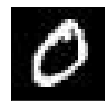

In [54]:
import matplotlib.pyplot as plt

class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

## Partie 3 : Tester l’efficacité du modèle

Nous cherchons à tester le modèle développer sur des nouvelles données. Pour un début, utiliser l’application Paint pour simuler des chiffres, et tester les performances de votre modèle sur les chiffres simulés.

Il sera intéressant de développer une application python pour reconnaitre automatiquement les chiffres en intégrant votre modèle CNN.